In [1]:
# Import required libraries and dependencies
import pathlib
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [6]:
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])

In [8]:
# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [9]:
# Create a DataFrame with the scaled data

df_market_transformed = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'])

# Copy the crypto names from the original data

df_market_transformed['coin_id'] = df_market_data.index

# Set the coinid column as index

df_market_transformed.set_index('coin_id', inplace=True)

# Display sample data

df_market_transformed.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [11]:
# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

C:\Users\bruce\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

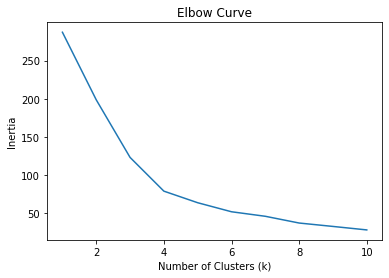

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow['k_values'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

    **Answer:** Near 3 where the elbow breaks

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)

KMeans(n_clusters=3)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = model.predict(market_data_scaled)

# Print the resulting array of cluster values.
print(market_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0
 1 1 1 1]


In [17]:
# Create a copy of the DataFrame
market_scaled_predictions = pd.DataFrame(market_data_scaled, columns=df_market_data.columns)

In [18]:
# Add a new column to the DataFrame with the predicted clusters

market_scaled_predictions['marketclusters'] = market_clusters
# Display sample data
market_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,marketclusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [19]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
market_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="marketclusters"
)

:NdOverlay   [marketclusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca = pca.fit_transform(market_scaled_predictions)
# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.64363513,  0.79763832,  0.47834419],
       [-0.47940588,  0.42007428,  0.9599407 ],
       [-0.42479368, -0.18628054, -0.64007654],
       [-0.46012195, -0.24395707, -0.47905126],
       [-1.26046168,  1.94250082,  1.89592642]])

In [22]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36983407, 0.34853598, 0.17605778])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89442783 or 89.4%

In [23]:
# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(
    market_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
market_pca_df['coin_id'] = df_market_data.index
# Set the coinid column as index
market_pca_df.set_index('coin_id', inplace=True)

# Display sample data
market_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.643635,0.797638,0.478344
ethereum,-0.479406,0.420074,0.959941
tether,-0.424794,-0.186281,-0.640077
ripple,-0.460122,-0.243957,-0.479051
bitcoin-cash,-1.260462,1.942501,1.895926


---

### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [25]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_pca_df)
    inertia.append(k_model.inertia_)


C:\Users\bruce\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [27]:
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,258.489643
1,2,167.517428
2,3,93.456492
3,4,49.349182
4,5,38.089510


In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The elbow appears to break near 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This appears to be the a similar result using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [30]:
# Fit the K-Means model using the PCA data
model.fit(market_pca_df)

KMeans(n_clusters=4, random_state=0)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(market_pca_df)
# Print the resulting array of cluster values.
print(k_4)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [32]:
# Create a copy of the DataFrame with the PCA data
market_pca_predictions_df = market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_predictions_df['Kclusters'] = k_4

# Display sample data
market_pca_predictions_df.head()

,PCA1,PCA2,PCA3,Kclusters
coin_id,,,,
bitcoin,-0.643635,0.797638,0.478344,0
ethereum,-0.479406,0.420074,0.959941,0
tether,-0.424794,-0.186281,-0.640077,3
ripple,-0.460122,-0.243957,-0.479051,3
bitcoin-cash,-1.260462,1.942501,1.895926,0


In [33]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
market_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="Kclusters",
    hover_cols=["coin_id"]
)

:NdOverlay   [Kclusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [34]:
import holoviews as hv

In [35]:
# Composite plot to contrast the Elbow curves
elbow_curve = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

# Composite plot 

composite_plot = elbow_curve

# Display the composite plot
hvplot.show(composite_plot)

Launching server at http://localhost:63144


In [36]:
# Composite plot to contrast the clusters
scatter_plots = market_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="Kclusters",
    hover_cols=["coin_id"]
)

# Composite plot
composite_plot = hv.Layout(scatter_plots).cols(2)

# Display the composite plot
hvplot.show(composite_plot)

Launching server at http://localhost:63145


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using fewer features to cluster the data using K-Means depends on the specific dataset and the which features are being removed. It is import to consider the trade-offs between dimenstionality reduction and information loss, as well as the potential impact to interpret the data and accuracy of the clustering results.